In [167]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import json
import seaborn

# Import API key
from Config import api_key


In [168]:
file_one = "winemag-data-130k-v2.csv"

In [169]:
df = pd.read_csv(file_one, encoding="ISO-8859-1")

In [170]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin OâKeefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [171]:
df = df[pd.notnull(df['price'])]
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [172]:
df.count()

Unnamed: 0               120975
country                  120916
description              120975
designation               86196
points                   120975
price                    120975
province                 120916
region_1                 101400
region_2                  50292
taster_name               96479
taster_twitter_handle     91559
title                    120975
variety                  120974
winery                   120975
dtype: int64

In [173]:
sort_by_price_desc = df.sort_values('price',ascending=False)
sort_by_price_desc.count()

Unnamed: 0               120975
country                  120916
description              120975
designation               86196
points                   120975
price                    120975
province                 120916
region_1                 101400
region_2                  50292
taster_name               96479
taster_twitter_handle     91559
title                    120975
variety                  120974
winery                   120975
dtype: int64

In [174]:
sort_by_price_desc = sort_by_price_desc[sort_by_price_desc.region_1.str.contains("©") == False]
sort_by_price_desc.count()


Unnamed: 0               98762
country                  98762
description              98762
designation              68891
points                   98762
price                    98762
province                 98762
region_1                 98762
region_2                 50292
taster_name              74652
taster_twitter_handle    71677
title                    98762
variety                  98762
winery                   98762
dtype: int64

In [175]:
sort_by_price_desc = sort_by_price_desc.iloc[0:2000] # first twenty five rows of dataframe
sort_by_price_desc.count()

Unnamed: 0               2000
country                  2000
description              2000
designation              1576
points                   2000
price                    2000
province                 2000
region_1                 2000
region_2                  725
taster_name              1531
taster_twitter_handle    1529
title                    2000
variety                  2000
winery                   2000
dtype: int64

In [176]:
top_city_list = sort_by_price_desc["region_1"].unique()
top_city_list

array(['Pomerol', 'Arroyo Seco', 'Margaux', 'Pauillac',
       'Saint-Ã\x89milion', 'Musigny', 'Brunello di Montalcino',
       'Montrachet', 'South Australia', 'Eden Valley', 'Sauternes',
       'Champagne', 'Menetou-Salon', 'Priorat', 'Paso Robles',
       'Chevalier-Montrachet', 'Grands-Echezeaux', 'Napa Valley',
       'Toscana', 'Chambertin', 'Ribera del Duero', 'Barolo',
       'Chambertin Clos de BÃ¨ze', 'BÃ¢tard-Montrachet',
       'Amarone della Valpolicella', 'Rutherford', 'ChÃ¢teauneuf-du-Pape',
       'Langhe', 'Bonnes-Mares', 'Bienvenues BÃ¢tard-Montrachet',
       'Mazoyeres-Chambertin', 'Sonoma County', 'Barbaresco', 'Cahors',
       'Stags Leap District', 'Clos de Vougeot', 'CÃ´te RÃ´tie',
       'Criots-BÃ¢tard-Montrachet', 'Umbria', 'Nuits-St.-Georges',
       'Saint-EstÃ¨phe', 'Saint-Julien', 'Charmes-Chambertin',
       'Chambolle-Musigny', 'Mazis-Chambertin', 'Rutherglen', 'Rioja',
       'Amarone della Valpolicella Classico', 'Bordeaux', 'Rivesaltes',
       'Clar

In [177]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
response_json = requests.get(query_url + "London").json()
print(json.dumps(response_json, indent=4, sort_keys=True))
response_json['name']
rtime = datetime.datetime.fromtimestamp(response_json['dt']).strftime('%m-%d-%Y')

{
    "base": "stations",
    "clouds": {
        "all": 92
    },
    "cod": 200,
    "coord": {
        "lat": 51.51,
        "lon": -0.13
    },
    "dt": 1531756200,
    "id": 2643743,
    "main": {
        "humidity": 28,
        "pressure": 1011,
        "temp": 27.18,
        "temp_max": 29,
        "temp_min": 26
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 5091,
        "message": 0.0151,
        "sunrise": 1531713767,
        "sunset": 1531771785,
        "type": 1
    },
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 5.1
    }
}


In [184]:
lat = []
temp = []
temp_avg = []
name = []
country = []
humidity = []
wind = []
cloud = []

# Loop through the list of cities and perform a request for data on each
for city2 in top_city_list:
    response = requests.get(query_url + city2, False).json()
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        temp_avg.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        name.append(response['name'])
        country.append(response['sys']['country'])
    except KeyError:
        continue
   

In [191]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "region_1": name,
    "country": country,
    "lat": lat,
    "temp": temp,
    "temp_avg": temp_avg,
    "clouds": cloud,
    "wind": wind,
    "humidity": humidity
   
}
weather_data = pd.DataFrame(weather_dict)
#weather_data['temp'] = (9 * weather_data['temp'] + (32 * 5))/5
#weather_data['temp_avg'] = (9 * weather_data['temp_avg'] + (32 * 5))/5
weather_data

,clouds,country,humidity,lat,region_1,temp,temp_avg,wind
0,75,FR,64,44.93,Pomerol,25.00,24.52,7.70
1,0,AR,58,-33.15,Arroyo Seco,13.00,13.00,7.70
2,75,FR,64,45.04,Margaux,24.00,24.00,7.70
3,75,FR,64,45.20,Pauillac,26.00,25.04,7.70
4,48,FR,33,47.16,Musigny,30.00,30.00,1.00
5,1,US,47,45.33,Eden Valley,27.00,25.56,4.10
6,75,FR,64,44.53,Sauternes,24.00,24.00,7.70
7,48,FR,58,49.56,Champagne,23.61,23.61,0.30
8,0,FR,34,47.23,Menetou-Salon,30.00,27.94,5.10
9,1,US,72,35.63,Paso Robles,19.00,17.37,1.50


In [192]:
merge_wine_weather = pd.merge(sort_by_price_desc, weather_data, on = "region_1", how = "left" )
merge_wine_weather.rename(columns={'country_x': 'Country', 'country_y': 'Country_Initial'}, inplace=True)
merge_wine_weather.head()

,Unnamed: 0,Country,description,designation,points,price,province,region_1,region_2,taster_name,...,title,variety,winery,clouds,Country_Initial,humidity,lat,temp,temp_avg,wind
0,15840,France,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,...,ChÃ¢teau PÃ©trus 2014 Pomerol,Bordeaux-style Red Blend,ChÃ¢teau PÃ©trus,75.0,FR,64.0,44.93,25.0,24.52,7.7
1,120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,...,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair,0.0,AR,58.0,-33.15,13.0,13.00,7.7
2,65352,France,This extravagantly perfumed wine has great jui...,NaN,97,2000.0,Bordeaux,Pomerol,NaN,Roger Voss,...,ChÃ¢teau PÃ©trus 2011 Pomerol,Bordeaux-style Red Blend,ChÃ¢teau PÃ©trus,75.0,FR,64.0,44.93,25.0,24.52,7.7
3,1558,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Roger Voss,...,ChÃ¢teau Margaux 2009 Margaux,Bordeaux-style Red Blend,ChÃ¢teau Margaux,75.0,FR,64.0,45.04,24.0,24.00,7.7
4,111753,France,"Almost black in color, this stunning wine is g...",NaN,100,1500.0,Bordeaux,Pauillac,NaN,Roger Voss,...,ChÃ¢teau Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,ChÃ¢teau Lafite Rothschild,75.0,FR,64.0,45.20,26.0,25.04,7.7


In [193]:
df_plot = merge_wine_weather[pd.notnull(merge_wine_weather['temp'])]
df_plot.count()

Unnamed: 0               914
Country                  914
description              914
designation              795
points                   914
price                    914
province                 914
region_1                 914
region_2                 218
taster_name              759
taster_twitter_handle    759
title                    914
variety                  914
winery                   914
clouds                   914
Country_Initial          914
humidity                 914
lat                      914
temp                     914
temp_avg                 914
wind                     914
dtype: int64

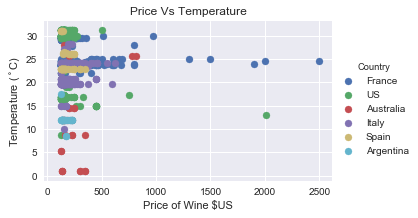

In [202]:
fg = seaborn.FacetGrid(data=  df_plot, hue= 'Country',  aspect=1.61)
fg.map(plt.scatter, 'price', 'temp_avg').add_legend()
axes = fg.axes.flatten()
axes[0].set_title("Price Vs Temperature")
axes[0].set_ylabel('Temperature ($^\circ$C)')
axes[0].set_xlabel('Price of Wine $US')
seaborn.set()
fg.savefig("expensive_price_temp.png")

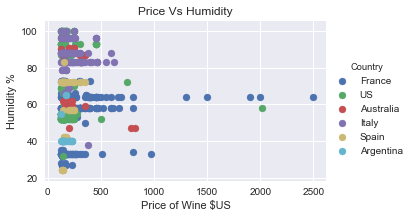

In [203]:
fg2 = seaborn.FacetGrid(data=  df_plot, hue= 'Country',  aspect=1.61)
fg2.map(plt.scatter, 'price', 'humidity').add_legend()
axes = fg2.axes.flatten()
axes[0].set_title("Price Vs Humidity")
axes[0].set_ylabel('Humidity %')
axes[0].set_xlabel('Price of Wine $US')
seaborn.set()
fg2.savefig("expensive_price_humidity.png")

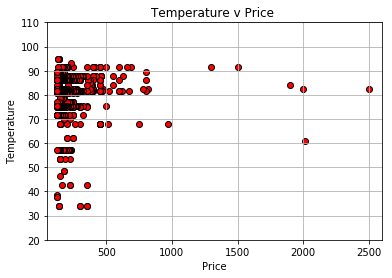

In [114]:
plt.figure(0)
plt.xlim(50,2600)
plt.ylim(20,110)
plt.title("Temperature v Price ")
plt.xlabel("Price")
plt.ylabel("Temperature")
plt.scatter(df_plot['price'],df_plot['temp'],  marker="o", facecolors="red", edgecolors="black")
plt.grid()
plt.savefig("Price_Temp.png")


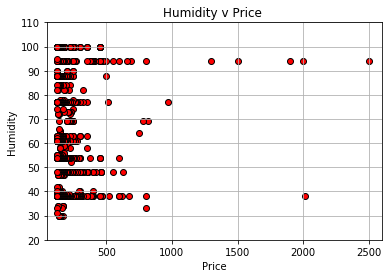

In [115]:
plt.figure(1)
plt.xlim(50,2600)
plt.ylim(20,110)
plt.title("Humidity v Price ")
plt.xlabel("Price")
plt.ylabel("Humidity")
plt.scatter(df_plot['price'],df_plot['humidity'],  marker="o", facecolors="red", edgecolors="black")
plt.grid()
plt.savefig("Price_humidity.png")

In [204]:
sort_by_price_asc = df.sort_values('price',ascending= True)
sort_by_price_asc.count()

Unnamed: 0               120975
country                  120916
description              120975
designation               86196
points                   120975
price                    120975
province                 120916
region_1                 101400
region_2                  50292
taster_name               96479
taster_twitter_handle     91559
title                    120975
variety                  120974
winery                   120975
dtype: int64

In [205]:
sort_by_price_asc = sort_by_price_asc[sort_by_price_asc.region_1.str.contains("©") == False]
sort_by_price_asc.count()

Unnamed: 0               98762
country                  98762
description              98762
designation              68891
points                   98762
price                    98762
province                 98762
region_1                 98762
region_2                 50292
taster_name              74652
taster_twitter_handle    71677
title                    98762
variety                  98762
winery                   98762
dtype: int64

In [218]:
sort_by_price_asc = sort_by_price_asc.iloc[0:4000] # first twenty five rows of dataframe
sort_by_price_asc.count()

Unnamed: 0               2000
country                  2000
description              2000
designation               951
points                   2000
price                    2000
province                 2000
region_1                 2000
region_2                  728
taster_name              1426
taster_twitter_handle    1419
title                    2000
variety                  2000
winery                   2000
dtype: int64

In [221]:
bottom_city_list = sort_by_price_asc["region_1"].unique()
len(bottom_city_list)

190

In [222]:
lat2 = []
temp2 = []
temp2_avg = []
name2 = []
country2 = []
humidity2 = []
wind2 = []
cloud2 = []

# Loop through the list of cities and perform a request for data on each
for city3 in bottom_city_list:
    response2 = requests.get(query_url + city3, False).json()
    try:
        lat2.append(response2['coord']['lat'])
        temp2.append(response2['main']['temp_max'])
        temp2_avg.append(response2['main']['temp'])
        humidity2.append(response2['main']['humidity'])
        wind2.append(response2['wind']['speed'])
        cloud2.append(response2['clouds']['all'])
        name2.append(response2['name'])
        country2.append(response2['sys']['country'])
    except KeyError:
        continue
 

In [223]:
# create a data frame from cities, lat, and temp
weather_dict2 = {
    "region_1": name2,
    "country": country2,
    "lat": lat2,
    "temp": temp2,
    "temp_avg": temp2_avg,
    "clouds": cloud2,
    "wind": wind2,
    "humidity": humidity2
   
}
weather_data2 = pd.DataFrame(weather_dict2)
weather_data2['temp'] = (9 * weather_data2['temp'] + (32 * 5))/5
weather_data2

,clouds,country,humidity,lat,region_1,temp,temp_avg,wind
0,20,US,58,39.28,Clarksburg,87.800,29.64,2.10
1,0,ES,37,38.61,Yecla,86.000,30.00,4.10
2,75,MX,53,24.05,California,71.600,22.00,3.60
3,0,AR,37,-32.89,Mendoza,55.400,13.00,2.10
4,75,IT,88,45.74,Puglia,77.000,18.50,1.50
5,0,PE,50,-14.68,La Mancha,66.758,19.31,1.40
6,40,US,49,38.90,Washington DC.,95.000,33.94,4.60
7,75,FR,53,42.66,Catalunya,77.000,25.00,10.80
8,20,US,78,35.09,Idaho,82.400,27.16,2.60
9,0,ES,32,41.35,Calatayud,84.200,27.49,4.60


In [224]:
merge_wine_weather2 = pd.merge(sort_by_price_asc, weather_data2, on = "region_1", how = "left" )
merge_wine_weather2.rename(columns={'country_x': 'Country', 'country_y': 'Country_Initial'}, inplace=True)
merge_wine_weather2.head()

,Unnamed: 0,Country,description,designation,points,price,province,region_1,region_2,taster_name,...,title,variety,winery,clouds,Country_Initial,humidity,lat,temp,temp_avg,wind
0,20484,US,"Fruity, soft and rather sweet, this wine smell...",NaN,85,4.0,California,Clarksburg,Central Valley,Jim Gordon,...,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote,20.0,US,58.0,39.28,87.8,29.64,2.1
1,112919,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.0,Levante,Yecla,NaN,Michael Schachner,...,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,Terrenal,0.0,ES,37.0,38.61,86.0,30.00,4.1
2,59507,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Jim Gordon,...,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties,75.0,MX,53.0,24.05,71.6,22.00,3.6
3,31530,US,"Packaged in a cute yellow recyclable Tetrapak,...",NaN,84,4.0,California,California,California Other,NaN,...,Bandit NV Chardonnay (California),Chardonnay,Bandit,75.0,MX,53.0,24.05,71.6,22.00,3.6
4,61768,Spain,This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Yecla,NaN,Michael Schachner,...,Terrenal 2010 Cabernet Sauvignon (Yecla),Cabernet Sauvignon,Terrenal,0.0,ES,37.0,38.61,86.0,30.00,4.1


In [225]:
df_plot2 = merge_wine_weather2[pd.notnull(merge_wine_weather2['temp'])]
df_plot2.count()

Unnamed: 0               1090
Country                  1090
description              1090
designation               494
points                   1090
price                    1090
province                 1090
region_1                 1090
region_2                  509
taster_name               690
taster_twitter_handle     685
title                    1090
variety                  1090
winery                   1090
clouds                   1090
Country_Initial          1090
humidity                 1090
lat                      1090
temp                     1090
temp_avg                 1090
wind                     1090
dtype: int64

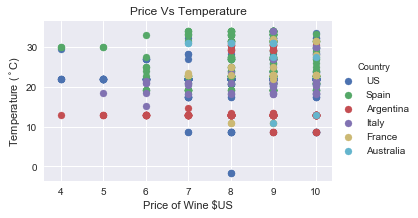

In [226]:
fg4 = seaborn.FacetGrid(data=  df_plot2, hue= 'Country',  aspect=1.61)
fg4.map(plt.scatter, 'price', 'temp_avg').add_legend()
axes = fg4.axes.flatten()
axes[0].set_title("Price Vs Temperature")
axes[0].set_ylabel('Temperature ($^\circ$C)')
axes[0].set_xlabel('Price of Wine $US')
seaborn.set()
fg4.savefig("low_price_temp.png")

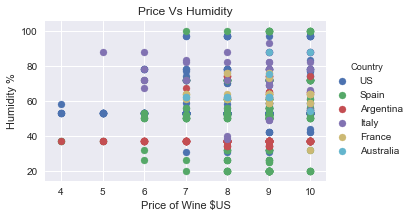

In [227]:
fg3 = seaborn.FacetGrid(data=  df_plot2, hue= 'Country',  aspect=1.61)
fg3.map(plt.scatter, 'price', 'humidity').add_legend()
axes = fg3.axes.flatten()
axes[0].set_title("Price Vs Humidity")
axes[0].set_ylabel('Humidity %')
axes[0].set_xlabel('Price of Wine $US')
seaborn.set()
fg3.savefig("low_price_humidity.png")

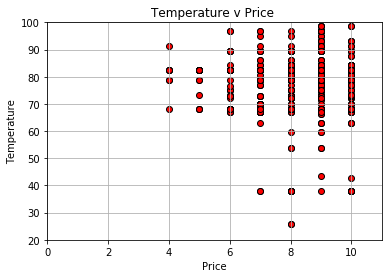

In [93]:
plt.figure(2)
plt.xlim(0,11)
plt.ylim(20,100)
plt.title("Temperature v Price ")
plt.xlabel("Price")
plt.ylabel("Temperature")
plt.scatter(df_plot2['price'],df_plot2['temp'],  marker="o", facecolors="red", edgecolors="black")
plt.grid()
plt.savefig("Low_Price_Temp.png")

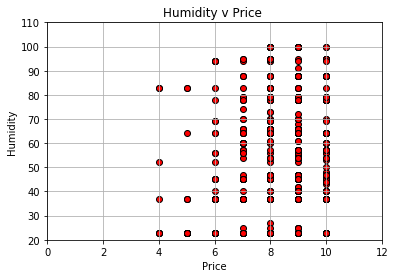

In [98]:
plt.figure(3)
plt.xlim(0,12)
plt.ylim(20,110)
plt.title("Humidity v Price ")
plt.xlabel("Price")
plt.ylabel("Humidity")
plt.scatter(df_plot2['price'],df_plot2['humidity'],  marker="o", facecolors="red", edgecolors="black")
plt.grid()
plt.savefig("Low_Price_humidity.png")

In [234]:
df_cali = df.loc[df['province'] == 'California']
df['region_1'] = df.region_1.str.replace('County?' , '')
df_cali.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain CuvÃ©e,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain CuvÃ©e Cabern...,Cabernet Sauvignon,Kirkland Signature
12,12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
14,14,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa


In [241]:
df_cali["region_1"] = df_cali["region_1"].astype(str)
cali_city_list = df_cali["region_1"].unique()
cali_city_list

C:\Users\Owner\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array(['Napa Valley', 'Alexander Valley', 'Central Coast', 'Paso Robles',
       'Sonoma Coast', 'Clarksburg', 'Dry Creek Valley', 'Sonoma Valley',
       'Lake ', 'North Coast', 'Santa Ynez Valley', 'California',
       'Howell Mountain', 'Calistoga', 'Knights Valley', 'Sonoma ',
       'Santa Clara Valley', 'Yountville', 'Rockpile',
       'Santa Lucia Highlands', 'Spring Mountain District', 'Monterey',
       'Carmel Valley', 'Santa Cruz Mountains', 'Edna Valley',
       'Russian River Valley', 'Arroyo Seco', 'Anderson Valley',
       'Nevada ', 'Santa Barbara ', 'Diamond Mountain District',
       'Mendocino', 'Sonoma Mountain', 'Amador ', 'St. Helena',
       'Cole Ranch', 'Santa Maria Valley', 'Arroyo Grande Valley',
       'Mendocino ', 'Rutherford', 'Templeton Gap District', 'Carneros',
       'Sta. Rita Hills', 'El Dorado', 'Suisun Valley', 'Lodi',
       'Monterey ', 'Chiles Valley', 'Calaveras ', 'Ballard Canyon',
       'Green Valley', 'Sierra Foothills', 'Yolo ', 'Oak Knol

In [261]:
lat3 = []
temp3 = []
temp_avg3 = []
name3 = []
country3 = []
humidity3 = []
wind3 = []
cloud3 = []

# Loop through the list of cities and perform a request for data on each
for city4 in cali_city_list:
    response = requests.get(query_url + city4, False).json()
    try:
        lat3.append(response['coord']['lat'])
        temp3.append(response['main']['temp_max'])
        temp_avg3.append(response['main']['temp'])
        humidity3.append(response['main']['humidity'])
        wind3.append(response['wind']['speed'])
        cloud3.append(response['clouds']['all'])
        name3.append(response['name'])
        country3.append(response['sys']['country'])
    except KeyError:
        continue
   

In [244]:
# create a data frame from cities, lat, and temp
weather_dict3 = {
    "region_1": name3,
    "country": country3,
    "lat": lat3,
    "temp": temp3,
    "temp_avg": temp_avg3,
    "clouds": cloud3,
    "wind": wind3,
    "humidity": humidity3
   
}
weather_data3 = pd.DataFrame(weather_dict3)
#weather_data2['temp'] = (9 * weather_data2['temp'] + (32 * 5))/5
weather_data3

,clouds,country,humidity,lat,region_1,temp,temp_avg,wind
0,92,AU,96,-41.27,Central Coast,9.06,9.06,4.90
1,1,US,26,35.63,Paso Robles,34.00,27.85,1.80
2,75,US,73,39.28,Clarksburg,35.00,29.16,4.60
3,0,DE,64,52.92,Lake,22.00,20.50,4.10
4,75,MX,44,24.05,California,24.00,24.00,3.10
5,1,US,47,38.58,Howell Mountain,33.00,27.72,4.10
6,1,US,47,38.58,Calistoga,33.00,27.74,4.10
7,1,US,47,38.29,Sonoma,33.00,26.87,4.10
8,1,US,47,38.40,Yountville,33.00,27.75,4.10
9,1,US,68,36.60,Monterey,25.00,20.26,5.10


In [245]:
merge_wine_weather3 = pd.merge(df_cali, weather_data3, on = "region_1", how = "left" )
merge_wine_weather3.rename(columns={'country_x': 'Country', 'country_y': 'Country_Initial'}, inplace=True)
merge_wine_weather3.head()

,Unnamed: 0,Country,description,designation,points,price,province,region_1,region_2,taster_name,...,title,variety,winery,clouds,Country_Initial,humidity,lat,temp,temp_avg,wind
0,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain CuvÃ©e,87,19.0,California,Napa Valley,Napa,Virginie Boone,...,Kirkland Signature 2011 Mountain CuvÃ©e Cabern...,Cabernet Sauvignon,Kirkland Signature,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,...,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,...,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou,92.0,AU,96.0,-41.27,9.06,9.06,4.9
3,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,...,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,1.0,US,26.0,35.63,34.00,27.85,1.8
4,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,...,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
df_plot4 = merge_wine_weather3[pd.notnull(merge_wine_weather3['temp'])]
df_plot4.count()

Unnamed: 0               11204
Country                  11204
description              11204
designation               6991
points                   11204
price                    11204
province                 11204
region_1                 11204
region_2                 11042
taster_name               6194
taster_twitter_handle     6194
title                    11204
variety                  11204
winery                   11204
clouds                   11204
Country_Initial          11204
humidity                 11204
lat                      11204
temp                     11204
temp_avg                 11204
wind                     11204
dtype: int64

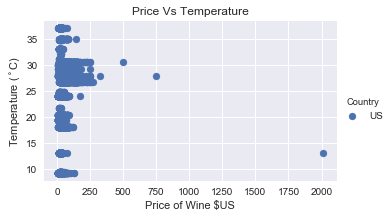

In [258]:
fg10 = seaborn.FacetGrid(data=  df_plot4, hue= 'Country',  aspect=1.61)
fg10.map(plt.scatter, 'price', 'temp_avg').add_legend()
axes = fg10.axes.flatten()
axes[0].set_title("Price Vs Temperature")
axes[0].set_ylabel('Temperature ($^\circ$C)')
axes[0].set_xlabel('Price of Wine $US')
seaborn.set()
fg10.savefig("cali_price_temp.png")

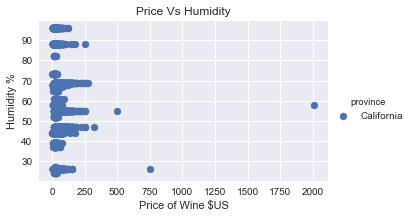

In [267]:
fg11 = seaborn.FacetGrid(data=  df_plot4, hue= 'province',  aspect=1.61)
fg11.map(plt.scatter, 'price', 'humidity').add_legend()
axes = fg11.axes.flatten()
axes[0].set_title("Price Vs Humidity")
axes[0].set_ylabel('Humidity %')
axes[0].set_xlabel('Price of Wine $US')
seaborn.set()
fg11.savefig("cali_price_humidity.png")

In [249]:
df_bordeaux = df.loc[df['province'] == 'Bordeaux']
#df['region_1'] = df.region_1.str.replace('County?' , '')
df_bordeaux.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
53,53,France,"Fruity and lightly herbaceous, this has fine t...",La Fleur d'AmÃ©lie,85,15.0,Bordeaux,Bordeaux Blanc,NaN,Roger Voss,@vossroger,ChÃ¢teau de Sours 2011 La Fleur d'AmÃ©lie (Bo...,Bordeaux-style White Blend,ChÃ¢teau de Sours
136,136,France,This wine's black cherry and plum flavors veer...,NaN,91,50.0,Bordeaux,Saint-Ãmilion,NaN,Joe Czerwinski,@JoeCz,LassÃ¨gue 2003 Saint-Ãmilion,Bordeaux-style Red Blend,LassÃ¨gue
419,419,France,"A smooth, perfumed wine that has softened just...",NaN,89,20.0,Bordeaux,Graves,NaN,Roger Voss,@vossroger,ChÃ¢teau de Callac 2011 Graves,Bordeaux-style Red Blend,ChÃ¢teau de Callac
477,477,France,An interesting percentage of Cabernet Franc gi...,NaN,92,65.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,ChÃ¢teau Vray Croix de Gay 2010 Pomerol,Bordeaux-style Red Blend,ChÃ¢teau Vray Croix de Gay
573,573,France,"Fruity and ripe, the wine also has some solid ...",NaN,89,14.0,Bordeaux,Bordeaux SupÃ©rieur,NaN,Roger Voss,@vossroger,ChÃ¢teau Bois Chantant 2015 Bordeaux SupÃ©rieur,Bordeaux-style Red Blend,ChÃ¢teau Bois Chantant


In [250]:
df_bordeaux["region_1"] = df_bordeaux["region_1"].astype(str)
bordeaux_city_list = df_bordeaux["region_1"].unique()
bordeaux_city_list

C:\Users\Owner\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array(['Bordeaux Blanc', 'Saint-Ã\x89milion', 'Graves', 'Pomerol',
       'Bordeaux SupÃ©rieur', 'Bordeaux', 'MÃ©doc', 'Haut-MÃ©doc',
       'Fronsac', 'Margaux', 'Saint-EstÃ¨phe', 'Blaye CÃ´tes de Bordeaux',
       'Montagne-Saint-Ã\x89milion', 'Bordeaux RosÃ©', 'Pessac-LÃ©ognan',
       'Saint-Julien', 'Pauillac', 'Lalande de Pomerol',
       'Cadillac CÃ´tes de Bordeaux', 'Entre-Deux-Mers',
       'CÃ´tes de Bourg', 'Saint-Georges-Saint-Ã\x89milion',
       'Listrac-MÃ©doc', 'CÃ´tes de Bordeaux',
       'Castillon CÃ´tes de Bordeaux', 'Moulis-en-MÃ©doc', 'Sauternes',
       'Francs CÃ´tes de Bordeaux', 'Puisseguin Saint-Ã\x89milion',
       'Bordeaux CÃ´tes de Francs ', 'Saint-Croix-du-Mont',
       'Sainte-Foy Bordeaux', 'Premieres CÃ´tes de Blaye',
       'Lussac Saint-Ã\x89milion', 'Cadillac', 'CrÃ©mant de Bordeaux',
       'Bordeaux Clairet', 'Premieres CÃ´tes de Bordeaux', 'CÃ©rons',
       'Barsac', 'nan', 'Canon-Fronsac', 'CÃ´tes de Castillon', 'Moulis'],
      dtype=object)

In [251]:
lat4 = []
temp4 = []
temp_avg4 = []
name4 = []
country4 = []
humidity4 = []
wind4 = []
cloud4 = []

# Loop through the list of cities and perform a request for data on each
for city5 in bordeaux_city_list:
    response = requests.get(query_url + city5, False).json()
    try:
        lat4.append(response['coord']['lat'])
        temp4.append(response['main']['temp_max'])
        temp_avg4.append(response['main']['temp'])
        humidity4.append(response['main']['humidity'])
        wind4.append(response['wind']['speed'])
        cloud4.append(response['clouds']['all'])
        name4.append(response['name'])
        country4.append(response['sys']['country'])
    except KeyError:
        continue
   

In [254]:
# create a data frame from cities, lat, and temp
weather_dict4 = {
    "region_1": name4,
    "country": country4,
    "lat": lat4,
    "temp": temp4,
    "temp_avg": temp_avg4,
    "clouds": cloud4,
    "wind": wind4,
    "humidity": humidity4
   
}
weather_data4 = pd.DataFrame(weather_dict4)
#weather_data2['temp'] = (9 * weather_data2['temp'] + (32 * 5))/5
weather_data4= weather_data4.loc[weather_data4['country'] == 'FR']
weather_data4

,clouds,country,humidity,lat,region_1,temp,temp_avg,wind
1,75,FR,82,44.93,Pomerol,20.00,20.00,1.50
2,75,FR,82,44.84,Bordeaux,20.00,19.44,1.50
3,75,FR,93,42.95,Fronsac,18.00,18.00,4.10
4,75,FR,82,45.04,Margaux,20.00,19.44,1.50
5,0,FR,61,43.31,Saint-Julien,25.00,22.69,7.70
6,75,FR,82,45.20,Pauillac,20.00,20.00,1.50
7,75,FR,82,44.53,Sauternes,20.00,19.66,1.50
9,75,FR,82,44.60,Barsac,20.00,19.47,1.50
11,48,FR,87,42.96,Moulis,17.56,17.56,4.35


In [255]:
merge_wine_weather4 = pd.merge(df_bordeaux, weather_data4, on = "region_1", how = "left" )
merge_wine_weather4.rename(columns={'country_x': 'Country', 'country_y': 'Country_Initial'}, inplace=True)
merge_wine_weather4.head()

,Unnamed: 0,Country,description,designation,points,price,province,region_1,region_2,taster_name,...,title,variety,winery,clouds,Country_Initial,humidity,lat,temp,temp_avg,wind
0,53,France,"Fruity and lightly herbaceous, this has fine t...",La Fleur d'AmÃ©lie,85,15.0,Bordeaux,Bordeaux Blanc,NaN,Roger Voss,...,ChÃ¢teau de Sours 2011 La Fleur d'AmÃ©lie (Bo...,Bordeaux-style White Blend,ChÃ¢teau de Sours,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,136,France,This wine's black cherry and plum flavors veer...,NaN,91,50.0,Bordeaux,Saint-Ãmilion,NaN,Joe Czerwinski,...,LassÃ¨gue 2003 Saint-Ãmilion,Bordeaux-style Red Blend,LassÃ¨gue,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,419,France,"A smooth, perfumed wine that has softened just...",NaN,89,20.0,Bordeaux,Graves,NaN,Roger Voss,...,ChÃ¢teau de Callac 2011 Graves,Bordeaux-style Red Blend,ChÃ¢teau de Callac,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,477,France,An interesting percentage of Cabernet Franc gi...,NaN,92,65.0,Bordeaux,Pomerol,NaN,Roger Voss,...,ChÃ¢teau Vray Croix de Gay 2010 Pomerol,Bordeaux-style Red Blend,ChÃ¢teau Vray Croix de Gay,75.0,FR,82.0,44.93,20.0,20.0,1.5
4,573,France,"Fruity and ripe, the wine also has some solid ...",NaN,89,14.0,Bordeaux,Bordeaux SupÃ©rieur,NaN,Roger Voss,...,ChÃ¢teau Bois Chantant 2015 Bordeaux SupÃ©rieur,Bordeaux-style Red Blend,ChÃ¢teau Bois Chantant,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
df_plot5 = merge_wine_weather4[pd.notnull(merge_wine_weather4['temp'])]
df_plot5.count()

Unnamed: 0               875
Country                  875
description              875
designation              264
points                   875
price                    875
province                 875
region_1                 875
region_2                   0
taster_name              868
taster_twitter_handle    868
title                    875
variety                  875
winery                   875
clouds                   875
Country_Initial          875
humidity                 875
lat                      875
temp                     875
temp_avg                 875
wind                     875
dtype: int64

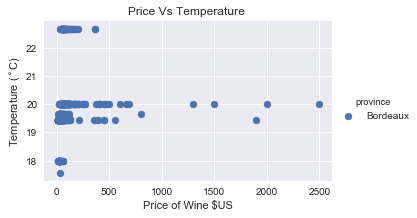

In [262]:
fg20 = seaborn.FacetGrid(data=  df_plot5, hue= 'province',  aspect=1.61)
fg20.map(plt.scatter, 'price', 'temp_avg').add_legend()
axes = fg20.axes.flatten()
axes[0].set_title("Price Vs Temperature ")
axes[0].set_ylabel('Temperature ($^\circ$C)')
axes[0].set_xlabel('Price of Wine $US')
seaborn.set()
fg20.savefig("bordeaux_price_temp.png")

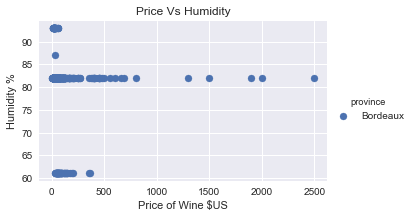

In [264]:
fg21 = seaborn.FacetGrid(data=  df_plot5, hue= 'province',  aspect=1.61)
fg21.map(plt.scatter, 'price', 'humidity').add_legend()
axes = fg21.axes.flatten()
axes[0].set_title("Price Vs Humidity")
axes[0].set_ylabel('Humidity %')
axes[0].set_xlabel('Price of Wine $US')
seaborn.set()
fg21.savefig("bordeaux_price_humidity.png")